In [1]:
from module._py4ipynb_.step0 import PARSE_ARGS
from module._py4ipynb_.step01 import list_all_images
from module._py4ipynb_.step02 import get_hog_features, bin_spatial, color_hist
from module._py4ipynb_.step02 import extract_features, slide_window, draw_boxes
from module._py4ipynb_.step02 import single_img_features, search_windows
from module._py4ipynb_.step02 import visualize, step02_test

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import time
from skimage.feature import hog
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import glob

%matplotlib inline

# parameter
directory = 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/'
args      = PARSE_ARGS(path=directory)

# STEP 1
---

Number of vehicle images found:  8792
Number of non-vehicle images found:  8968


D:\INSTALL\Anaconda3\envs\keras\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


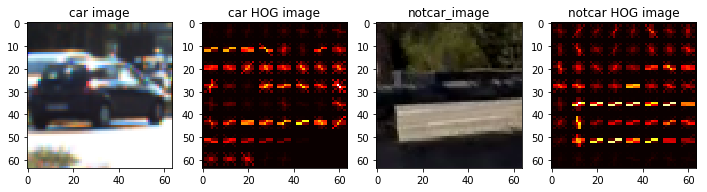

In [4]:
step02_test(args)

---

In [15]:
# list_all_images
cars, notcars = list_all_images(args)

# choose random car/notcar indices
car_ind = np.random.randint(0, len(cars))
notcar_ind = np.random.randint(0, len(notcars))

# read in car / notcar images
car_image = mpimg.imread(cars[car_ind])
notcar_image = mpimg.imread(notcars[notcar_ind])

Number of vehicle images found:  8792
Number of non-vehicle images found:  8968


In [19]:
# define feature parameters
color_space    = 'RGB' # can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient         = 6  # 9
pix_per_cell   = 8
cell_per_block = 2
hog_channel    = 0 # 'ALL' # can be 0, 1, 2, or 'ALL'
spatial_size   = (16,16) # (32,32)  # spatial binning dimensions
hist_bins      = 16  # 32  # number of histogram bins
spatial_feat   = True # spatial features on or off
hist_feat      = True # histogram features on or off
hog_feat       = True # HOG features on or off

In [17]:
car_features, car_hog_image = single_img_features(car_image, color_space=color_space, spatial_size=spatial_size,
                                                  hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell,
                                                  cell_per_block=cell_per_block, hog_channel=hog_channel,
                                                  spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat,
                                                  vis=True)

D:\INSTALL\Anaconda3\envs\keras\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [18]:
notcar_features, notcar_hog_image = single_img_features(notcar_image, color_space=color_space,
                                                        spatial_size=spatial_size,
                                                        hist_bins=hist_bins, orient=orient,
                                                        pix_per_cell=pix_per_cell,
                                                        cell_per_block=cell_per_block, hog_channel=hog_channel,
                                                        spatial_feat=spatial_feat, hist_feat=hist_feat,
                                                        hog_feat=hog_feat,
                                                        vis=True)

D:\INSTALL\Anaconda3\envs\keras\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [21]:
t            = time.time()
n_samples    = 1000
random_idxs  = np.random.randint(0, len(cars), n_samples)
test_cars    = np.array(cars)[random_idxs]
test_noncars = np.array(notcars)[random_idxs]

In [22]:
car_features = extract_features(test_cars, color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins,
                                orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)


D:\INSTALL\Anaconda3\envs\keras\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [23]:
notcar_features = extract_features(test_noncars, color_space=color_space, spatial_size=spatial_size, hist_bins=hist_bins,
                                orient=orient, pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                hog_channel=hog_channel, spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat)


D:\INSTALL\Anaconda3\envs\keras\lib\site-packages\skimage\feature\_hog.py:150: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15. To supress this message specify explicitly the normalization method.
  skimage_deprecation)


In [24]:
print(time.time()-t, 'Seconds to compute features...')

X = np.vstack((car_features, notcar_features)).astype(np.float64)
# fit a per_column scaler
X_scaler = StandardScaler().fit(X)
# apply the scaler to X
scaled_X = X_scaler.transform(X)

56.672961950302124 Seconds to compute features...


In [25]:
# define the labels vector
y = np.hstack(( np.ones(len(car_features)), np.zeros(len(notcar_features)) ))

In [26]:
# split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.1, random_state=rand_state)

print('Using:', orient, 'orientations,', pix_per_cell, 'pixels per cell,', cell_per_block,
      'cells per block,', hist_bins, 'histogram bins, and', spatial_size, 'spatial sampling')
print('Feature vector length:', len(X_train[0]))

ValueError: Found input variables with inconsistent numbers of samples: [2, 1993]

In [27]:
# use a linear SVC
svc = LinearSVC()
# check the training time for the SVC
t   = time.time()
svc.fit(X_train, y_train)
print(round(time.time()-t, 2), 'Seconds to train SVC...')
# check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))


NameError: name 'X_train' is not defined

---
# VARIABLES vs VALUES
---

In [38]:
cars[:5]

['D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/GTI_Far\\image0000.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/GTI_Far\\image0001.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/GTI_Far\\image0002.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/GTI_Far\\image0003.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/GTI_Far\\image0004.png']

In [39]:
notcars[:5]

['D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/Extras\\extra1.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/Extras\\extra10.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/Extras\\extra100.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/Extras\\extra1000.png',
 'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/Extras\\extra1001.png']

In [41]:
car_ind, notcar_ind

(1641, 7997)

In [45]:
car_features #,car_hog_image

[array([0.20588236, 0.20588236, 0.20588236, ..., 0.06677495, 0.00346724,
        0.00548219])]

In [47]:
notcar_features #, notcar_hog_image

array([0.16470589, 0.15686275, 0.13529412, ..., 0.09035915, 0.01218498,
       0.00661267])

In [52]:
random_idxs[:5], test_cars[:3], test_noncars[:3]

(array([8585, 2821, 5758, 4800,  749]),
 array(['D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/KITTI_extracted\\812.png',
        'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/GTI_Right\\image0970.png',
        'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/vehicles/KITTI_extracted\\3640.png'],
       dtype='<U90'),
 array(['D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/GTI\\image654.png',
        'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/Extras\\extra3934.png',
        'D:/USER/_PROJECT_/_PRJ05_/_1_WIP/_1_forge/_v0_/data/non-vehicles/GTI\\image162.png'],
       dtype='<U85'))

In [28]:
X

array([[0.20588236, 0.20588236, 0.20588236, ..., 0.06677495, 0.00346724,
        0.00548219],
       [0.16470589, 0.15686275, 0.13529412, ..., 0.09035915, 0.01218498,
        0.00661267]])

In [29]:
car_features

[array([0.20588236, 0.20588236, 0.20588236, ..., 0.06677495, 0.00346724,
        0.00548219])]

In [31]:
notcar_features

array([0.16470589, 0.15686275, 0.13529412, ..., 0.09035915, 0.01218498,
       0.00661267])

In [32]:
X_scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [36]:
scaled_X[0]

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [35]:
len(scaled_X[0])

1992

---
# ANNEXE
---

In [ ]:
car_features, car_hog_image = single_img_features(car_image, color_space=color_space, spatial_size=spatial_size,
                                                  hist_bins=hist_bins, orient=orient, pix_per_cell=pix_per_cell,
                                                  cell_per_block=cell_per_block, hog_channel=hog_channel,
                                                  spatial_feat=spatial_feat, hist_feat=hist_feat, hog_feat=hog_feat,
                                                  vis=True)

In [ ]:
images = [car_image, car_hog_image, notcar_image, notcar_hog_image]
titles = ['car image', 'car HOG image', 'notcar_image', 'notcar HOG image']
figure = plt.figure(figsize=(12, 3))  # , dpi=80)
visualize(figure, 1, 4, images, titles)